<a href="https://colab.research.google.com/github/UlitiM2/tasks_university/blob/master/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%2C%20%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5%20%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_2%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В этой работе вам предстоит исследовать неточности в данных и устранить их. В конце – проанализировать результаты.

Все необходимые этапы предобработки данных описаны в задании, ваша задача – реализовать их.

# Данные

[Monster.com jobs](https://www.kaggle.com/code/ankkur13/perfect-dataset-to-get-the-hands-dirty/data) - датасет о вакансиях, данные в котором намеренно не предобработаны. Есть несколько сомнительных столбцов с 1 уникальным значением, тип работы не стандартизирован, расположение может содержать штат, город и почтовый индекс или только часть из этих данных, или совершенно неясные данные вроде "Contact name Tony Zerio" или "Sr. Process Engineer, Manufacturing", в графе с зарплатой помимо зарплаты есть вещи вроде "Excellent Pay and Incentives" и другие проблемы.

Практически все столбцы в датасете нельзя использовать для анализа без предобработки.

К датасету на kaggle приложен блокнот с примером его очистки. Рекомендуется ознакомиться с ним после выполнения задания, чтобы оценить сходства и различия в подходах.

Целью обработки датасета будем считать использование для многостороннего изучения данных в дальнейшем, то есть мы обработаем данные таким образом чтобы их удобно было использовать для широкого спекра задач анализа данных.

### Изучение датасета

In [ ]:
# эти модули, вероятнее всего, понадобятся вам в работе
# если в процессе захотите использовать что-то еще, можно добавить
import re
import numpy as np
import pandas as pd
import missingno as msno
from matplotlib import pyplot as plt

Загрузите датасет и выведите случайные несколько строк из него. Постарайтесь понять, что из себя представляют данные в столбцах.

In [ ]:
 df = pd.read_csv('sample.csv')
 df

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
0,United States of America,US,NaN,No,jobs.monster.com,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,http://jobview.monster.com/it-support-technici...,NaN,IT/Software Development,11d599f229a80023d2f40e7c52cd941e
1,United States of America,US,NaN,No,jobs.monster.com,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-e...,NaN,NaN,e4cbb126dabf22159aff90223243ff2a
2,United States of America,US,NaN,No,jobs.monster.com,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,http://jobview.monster.com/senior-training-lea...,NaN,NaN,839106b353877fa3d896ffb9c1fe01c0
3,United States of America,US,NaN,No,jobs.monster.com,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,http://jobview.monster.com/engineer-quality-jo...,NaN,Experienced (Non-Manager),58435fcab804439efdcaa7ecca0fd783
4,United States of America,US,NaN,No,jobs.monster.com,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,http://jobview.monster.com/shift-supervisor-pa...,NaN,Project/Program Management,64d0272dc8496abfd9523a8df63c184c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21995,United States of America,US,NaN,No,jobs.monster.com,This is a major premier Cincinnati based finan...,Assistant Vice President - Controller Job in C...,Full Time,"Cincinnati, OH",NaN,http://jobview.monster.com/Assistant-Vice-Pres...,"120,000.00 - 160,000.00 $ /yearbonus",NaN,a80bc8cc3a90c17eef418963803bc640
21996,United States of America,US,NaN,No,jobs.monster.com,Luxury homebuilder in Cincinnati seeking multi...,Accountant Job in Cincinnati,Full Time,"Cincinnati, OH 45236",Construction - Residential & Commercial/Office,http://jobview.monster.com/Accountant-Job-Cinc...,"45,000.00 - 60,000.00 $ /year",Manager (Manager/Supervisor of Staff),419a3714be2b30a10f628de207d041de
21997,United States of America,US,NaN,No,jobs.monster.com,RE: Adobe AEM- Client - Loca...,AEM/CQ developer Job in Chicago,Full Time,"Chicago, IL 60602",NaN,http://jobview.monster.com/AEM-CQ5-developer-J...,NaN,NaN,5a590350b73b2cec46b05750a208e345
21998,United States of America,US,NaN,No,jobs.monster.com,Jernberg Industries was established in 1937 an...,Electrician - Experienced Forging Electrician ...,Full Time Employee,"Chicago, IL 60609","Jernberg Industries, Inc.",http://jobview.monster.com/Electrician-Experie...,25.00 - 28.00 $ /hour,Installation/Maintenance/Repair,40161cf61c283af9dc2b0a62947a5f1b


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Задание**

Составьте таблицу, в которой будет содержаться название столбца, тип данных в нем и краткое описание проблем, которые вы заметили при первом взгляде на данные.

(Таблицу можно представить в виде текстового поля, датафрейма или картинки – формат неважен, важно содержание)

#### Пустые значения

Начнем работу: проанализируем пустые ячейки.
Выясните, в каких столбцах и в каком количестве отсутствуют данные.

> Помимо создания таблички, воспользуйтесь библиотекой `missingno` и визуально оцените количество пропущенных данных.

<Axes: >

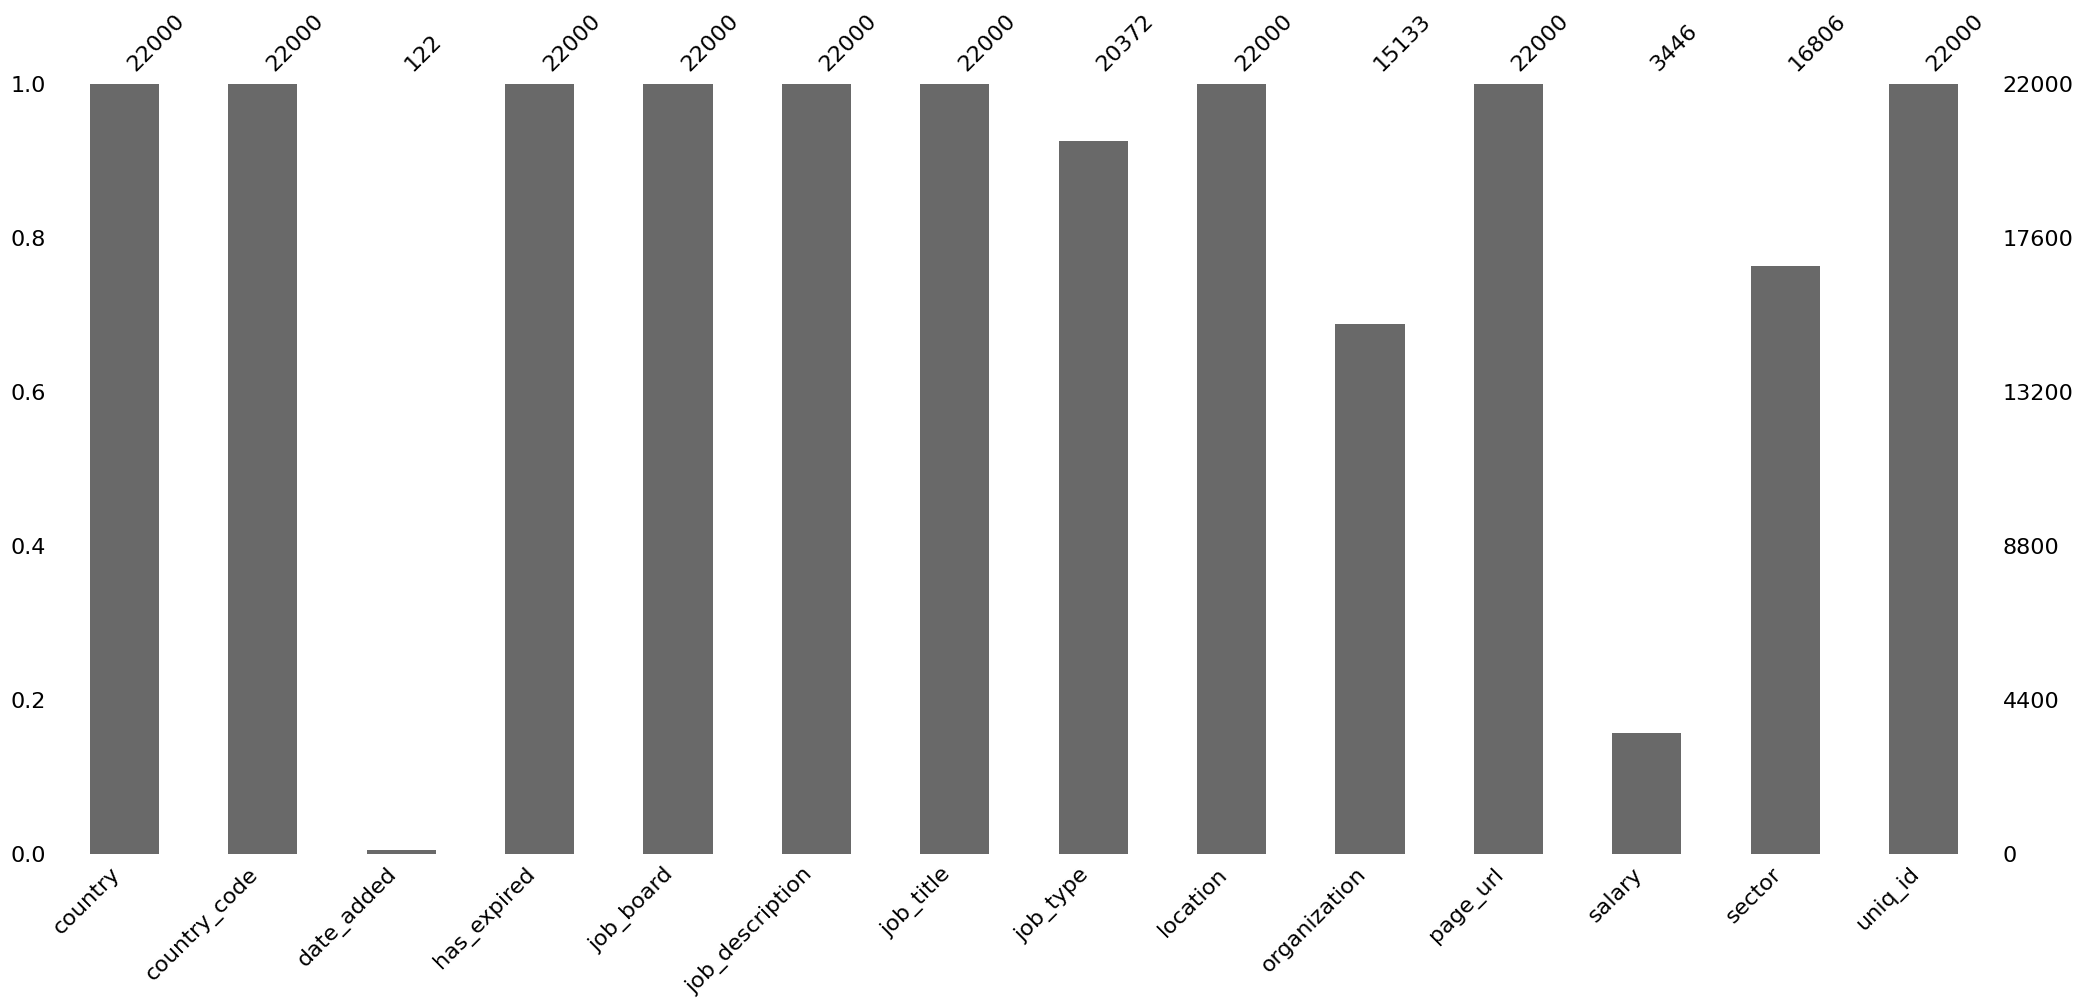

In [ ]:
import missingno as msno
msno.bar(df)

In [ ]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

country - 0%
country_code - 0%
date_added - 99%
has_expired - 0%
job_board - 0%
job_description - 0%
job_title - 0%
job_type - 7%
location - 0%
organization - 31%
page_url - 0%
salary - 84%
sector - 24%
uniq_id - 0%


Проверьте, как изменится размер датасета, если мы примем решение удалить все строки, где есть пустые значения. Сделайте выводы.

In [ ]:
df_new = df.dropna()
df_new


,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
279,United States of America,US,6/10/2016,No,jobs.monster.com,"At American Family Insurance, we're firmly com...",Insurance Sales - Customer Service Job in Eden...,Full Time Employee,"Eden Prairie, MN 55344",Insurance,http://jobview.monster.com/insurance-sales-cus...,15.00 - 21.00 $ /hour,Accounting/Finance/Insurance,64a597e5dd17740aadf4b0e8047b51a5
7419,United States of America,US,4/27/2016,No,jobs.monster.com,A CUSTOMER SERVICE JOB … that might become a c...,Customer Service Representative Job in Las Vegas,Full Time Employee,"Las Vegas, NV 89129",Business Services - Other,http://jobview.local-jobs.monster.com/Customer...,$10.50+ /hour,Customer Support/Client Care,7baad80eae733c2518f0a500609c1e90
17048,United States of America,US,8/5/2016,No,jobs.monster.com,"At American Family Insurance, we're firmly com...",Licensed Insurance Sales Assistant (Customer S...,Full Time Employee,"Covington, GA",Insurance,http://jobview.monster.com/licensed-insurance-...,$10.50+ /hour,Sales/Retail/Business Development,c486cae7c4c1105a85e50448fb9c0dd0
17052,United States of America,US,8/2/2016,No,jobs.monster.com,"At American Family Insurance, we're firmly com...",Customer Service Agent / Insurance Sales Assis...,Full Time Employee,"Alpharetta, GA 30009",Insurance,http://jobview.monster.com/customer-service-ag...,11.00 - 15.00 $ /hour,Sales/Retail/Business Development,6ddfdf91eb991d9d31f3cd2ee4492eb9
18709,United States of America,US,3/11/2016,No,jobs.monster.com,There's No Place Like The Neighborhood!It's a ...,Restaurant Manager - Applebee's Parsippany,"Full Time, Employee","Parsippany, NJ 07054",Restaurant/Food Services,http://jobview.monster.com/Restaurant-Manager-...,50.00 - 65.00 $ /year,Food Services/Hospitality,4fb8c68e3b6efcec902801a96f2cb004


**Больше всего пропусков в столбце date_added, поэтому смотрим сколько строк останется при удалении всех строк, где значения этого слобца нет. Мы получаем 5 строк, когда до очистки датафрейм содержал 22000 строк**


Принимаем решение сохранить как можно больше данных, удалять все – плохой план. Если удалить все, можем потерять важную информацию.

#### Нерелевантные колонки

Оценим, какие столбцы необходимо оставить, а какие можно удалить.
Рассмотрите следующие идеи:
1. Есть ли столбцы, в которых встречается всего одно значение? Как их можно использовать в анализе?
2. Есть ли столбцы, в которых содержатся данные, которые есть еще в каком-то столбце?
3. Какие столбцы содержательно нерелевантны? Обоснуйте.

In [ ]:
df['country'].unique()


array(['United States of America'], dtype=object)

In [ ]:
df['country_code'].unique()

array(['US'], dtype=object)

In [ ]:
df['date_added'].unique()

array([nan, '5/10/2016', '5/13/2016', '5/9/2016', '6/10/2016', '1/2/2017',
       '6/17/2016', '6/24/2016', '6/23/2016', '12/20/2016', '12/12/2016',
       '7/15/2016', '7/8/2016', '10/31/2016', '10/28/2016', '4/28/2016',
       '4/27/2016', '4/29/2016', '9/12/2016', '1/16/2017', '9/22/2016',
       '3/25/2016', '6/20/2016', '11/17/2016', '7/11/2016', '12/7/2016',
       '12/14/2016', '12/29/2016', '5/5/2016', '5/6/2016', '05/09/2016',
       '8/11/2016', '3/17/2016', '4/4/2016', '4/7/2016', '4/6/2016',
       '9/21/2016', '5/18/2016', '3/15/2016', '5/19/2016', '6/8/2016',
       '6/7/2016', '10/18/2016', '12/2/2016', '11/7/2016', '3/29/2016',
       '4/8/2016', '5/26/2016', '9/15/2016', '8/17/2016', '11/21/2016',
       '12/15/2016', '10/27/2016', '10/25/2016', '6/27/2016', '7/5/2016',
       '7/4/2016', '7/7/2016', '8/25/2016', '9/5/2016', '8/23/2016',
       '9/2/2016', '9/1/2016', '8/31/2016', '9/26/2016', '8/5/2016',
       '8/2/2016', '3/28/2016', '3/22/2016', '2/29/2016', '9/9/2

In [ ]:
df['has_expired'].unique()

array(['No'], dtype=object)

In [ ]:
df['job_board'].unique()

array(['jobs.monster.com'], dtype=object)

In [ ]:
df['job_description'].unique()

In [ ]:
df['job_title'].unique()

In [ ]:
df['job_type'].unique()

In [ ]:
df['location'].unique()

In [ ]:
df['organization'].unique()

In [ ]:
df['page_url'].unique()

In [ ]:
df['salary'].unique()

array([nan, '9.00 - 13.00 $ /hour', '80,000.00 - 95,000.00 $ /year', ...,
       '$80,000.00+ /year', '120,000.00 - 160,000.00 $ /yearbonus',
       '40,000.00 - 46,000.00 $ /year+ annual bonus (up to 15% of salary)'],
      dtype=object)

In [ ]:
df['sector'].unique()

 **Столбцы country, country_code, has_expired, job_board содержат только по одному уникальному значению**





**Анализируя уникальные значения можно увидеть, что перемешаны значения location, organisation. Это нужно исправить**

In [ ]:
l=df.location.unique()
unique_loc={}
for i in range(len(l)):
    unique_loc[i]=l[i]
for k in df.organization.keys():
        if  df.organization[k] in l:
            temp=df.organization[k]
            df.organization[k]=df.location[k]
            df.location[k]=temp
df.head(60)

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
0,United States of America,US,NaN,No,jobs.monster.com,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,http://jobview.monster.com/it-support-technici...,NaN,IT/Software Development,11d599f229a80023d2f40e7c52cd941e
1,United States of America,US,NaN,No,jobs.monster.com,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-e...,NaN,NaN,e4cbb126dabf22159aff90223243ff2a
2,United States of America,US,NaN,No,jobs.monster.com,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,http://jobview.monster.com/senior-training-lea...,NaN,NaN,839106b353877fa3d896ffb9c1fe01c0
3,United States of America,US,NaN,No,jobs.monster.com,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,http://jobview.monster.com/engineer-quality-jo...,NaN,Experienced (Non-Manager),58435fcab804439efdcaa7ecca0fd783
4,United States of America,US,NaN,No,jobs.monster.com,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,http://jobview.monster.com/shift-supervisor-pa...,NaN,Project/Program Management,64d0272dc8496abfd9523a8df63c184c
5,United States of America,US,NaN,No,jobs.monster.com,Job Description Job #: 720298Apex Systems has...,Construction PM - Charlottesville Job in Charl...,Full Time Employee,"Charlottesville, VA",Computer/IT Services,http://jobview.monster.com/construction-pm-cha...,NaN,Experienced (Non-Manager),1e2637cb5f7a2c4615a99a26c0566c66
6,United States of America,US,NaN,No,jobs.monster.com,Report this job About the Job Based in San Fra...,CyberCoders Job Application for Principal QA E...,"Full Time, Employee",Contact name Tony Zerio,Computer Software,http://jobview.monster.com/principal-qa-engine...,NaN,NaN,455802d725fde67293970ab3953b1d39
7,United States of America,US,NaN,No,jobs.monster.com,RESPONSIBILITIES:Kforce has a client seeking a...,Mailroom Clerk Job in Austin,Full Time Employee,"Austin, TX 73301",NaN,http://jobview.monster.com/mailroom-clerk-job-...,NaN,Experienced (Non-Manager),549a0541e4452ecd155efc032aaa72d7
8,United States of America,US,NaN,No,jobs.monster.com,"Part-Time, 4:30 pm - 9:30 pm, Mon - Fri Brookd...",Housekeeper Job in Austin,Part Time Employee,"Austin, TX 78746",Hotels and Lodging Personal and Household Serv...,http://jobview.monster.com/housekeeper-job-aus...,NaN,Customer Support/Client Care,a6a2b5e825b8ce1c3b517adb2497c5ed
9,United States of America,US,NaN,No,jobs.monster.com,"Insituform Technologies, LLC, an Aegion compan...",Video Data Management /Transportation Technici...,NaN,"Chesterfield, MO",NaN,http://jobview.monster.com/video-data-manageme...,NaN,NaN,73a9ba2b706e02628fa22ca1357174b1


**Изменения видно на примере 29 строки**

**Не имеющими смысла колонками я выделила: country, country_code, has_expired, job_board, так как они содержат только 1 значение, а также стобец uniq_id, так как нам не нужен он в анализе(это ничего не дает при исследованиях)**

In [ ]:
df=df.drop(['country','country_code','job_board','has_expired', 'uniq_id'], axis=1)
df

,date_added,job_description,job_title,job_type,location,organization,page_url,salary,sector
0,NaN,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,http://jobview.monster.com/it-support-technici...,NaN,IT/Software Development
1,NaN,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-e...,NaN,NaN
2,NaN,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,http://jobview.monster.com/senior-training-lea...,NaN,NaN
3,NaN,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,http://jobview.monster.com/engineer-quality-jo...,NaN,Experienced (Non-Manager)
4,NaN,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,http://jobview.monster.com/shift-supervisor-pa...,NaN,Project/Program Management
...,...,...,...,...,...,...,...,...,...
21995,NaN,This is a major premier Cincinnati based finan...,Assistant Vice President - Controller Job in C...,Full Time,"Cincinnati, OH",NaN,http://jobview.monster.com/Assistant-Vice-Pres...,"120,000.00 - 160,000.00 $ /yearbonus",NaN
21996,NaN,Luxury homebuilder in Cincinnati seeking multi...,Accountant Job in Cincinnati,Full Time,"Cincinnati, OH 45236",Construction - Residential & Commercial/Office,http://jobview.monster.com/Accountant-Job-Cinc...,"45,000.00 - 60,000.00 $ /year",Manager (Manager/Supervisor of Staff)
21997,NaN,RE: Adobe AEM- Client - Loca...,AEM/CQ developer Job in Chicago,Full Time,"Chicago, IL 60602",NaN,http://jobview.monster.com/AEM-CQ5-developer-J...,NaN,NaN
21998,NaN,Jernberg Industries was established in 1937 an...,Electrician - Experienced Forging Electrician ...,Full Time Employee,"Chicago, IL 60609","Jernberg Industries, Inc.",http://jobview.monster.com/Electrician-Experie...,25.00 - 28.00 $ /hour,Installation/Maintenance/Repair


#### Дублирование данных

Определите столбцы, по которым можно однозначно идентифицировать запись в датасете. Одинаковыми будем считать строки, в которых значения в этих столбцах совпадает.

Удалите одно из двух повторений и сравните, как изменились характеристики датасета.

In [ ]:
key = ['job_title', 'job_type', 'location', 'organization', 'date_added']
df_2 = df.drop_duplicates(subset=key)
df_2.reset_index(drop= True , inplace= True)
print(df.shape)
print(df_2.shape)
df_2

(22000, 9)
(20010, 9)


,date_added,job_description,job_title,job_type,location,organization,page_url,salary,sector
0,NaN,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,http://jobview.monster.com/it-support-technici...,NaN,IT/Software Development
1,NaN,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-e...,NaN,NaN
2,NaN,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,http://jobview.monster.com/senior-training-lea...,NaN,NaN
3,NaN,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,http://jobview.monster.com/engineer-quality-jo...,NaN,Experienced (Non-Manager)
4,NaN,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,http://jobview.monster.com/shift-supervisor-pa...,NaN,Project/Program Management
...,...,...,...,...,...,...,...,...,...
20005,NaN,This is a major premier Cincinnati based finan...,Assistant Vice President - Controller Job in C...,Full Time,"Cincinnati, OH",NaN,http://jobview.monster.com/Assistant-Vice-Pres...,"120,000.00 - 160,000.00 $ /yearbonus",NaN
20006,NaN,Luxury homebuilder in Cincinnati seeking multi...,Accountant Job in Cincinnati,Full Time,"Cincinnati, OH 45236",Construction - Residential & Commercial/Office,http://jobview.monster.com/Accountant-Job-Cinc...,"45,000.00 - 60,000.00 $ /year",Manager (Manager/Supervisor of Staff)
20007,NaN,RE: Adobe AEM- Client - Loca...,AEM/CQ developer Job in Chicago,Full Time,"Chicago, IL 60602",NaN,http://jobview.monster.com/AEM-CQ5-developer-J...,NaN,NaN
20008,NaN,Jernberg Industries was established in 1937 an...,Electrician - Experienced Forging Electrician ...,Full Time Employee,"Chicago, IL 60609","Jernberg Industries, Inc.",http://jobview.monster.com/Electrician-Experie...,25.00 - 28.00 $ /hour,Installation/Maintenance/Repair


**Количество строк стало 20010, то есть уменьшилось на 1990**

### Обработка датасета

#### Первичная обработка

Выше мы оценили, какие есть проблемы с дубликатами и отсутствующими значениями.

Первым делом устраним их. Удалим все, что можно удалить без потери данных. На всякий случай сохраним копию датасета. В конце нам понадобится оценивать результаты. Она пригодится.

**Все это сделано выше**

In [ ]:
# put your code here

In [ ]:
# Удаление строк или столбцы с пустыми ячейками
# put your code here

In [ ]:
# Удаление нерелевантных столбцов
# put your code here

In [ ]:
# Удаление дубликатов
# put your code here

#### Обработка колонки location

Выясните, какие форматы значений есть в столбце `location`. Сделайте выводы.

In [ ]:
location=df_2['location']
print(location)

0                                        Madison, WI 53702
1                                        Madison, WI 53708
2        DePuy Synthes Companies is a member of Johnson...
3                                                Dixon, CA
4                                             Camphill, PA
                               ...                        
20005                                       Cincinnati, OH
20006                                 Cincinnati, OH 45236
20007                                    Chicago, IL 60602
20008                                    Chicago, IL 60609
20009                                       Cincinnati, OH
Name: location, Length: 20010, dtype: object


На этом этапе у вас должно получиться минимум 2 валидных формата данных (город+код штата, город+код штата+индекс). Напишите регулярные выражения или воспользуйтесь известными вам методами обработки текста для поиска этих форматов. Если, на ваш взгляд, стоит выделить больше форматов, сделайте это.

Визуализируйте количество найденных форматов данных на столбиковой или круговой диаграмме.

In [ ]:
pattern_state_code_zip = r'^\w+\,\s+\w+\s+\d+$'
pattern_state_code = r'^\w+\,\s+\w+$'

state_code_zip_count = df_2['location'].str.contains(pattern_state_code_zip).sum()
state_code_count = df_2['location'].str.contains(pattern_state_code).sum()
other_count = len(df_2) - state_code_zip_count - state_code_count


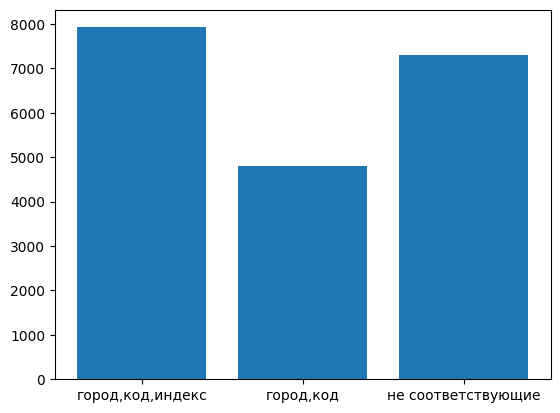

In [ ]:
labels = 'город,код,индекс', 'город,код', 'не соответствующие'
sizes = [state_code_zip_count, state_code_count, other_count]
plt.bar(labels, sizes)
plt.show()

Строки с невалидными данными выделяем в отдельный датасет. Остальные данные локаций разделяем на 3 колонки: город, штат, индекс. Колонка индекс будет содержать пустые значения.

In [ ]:
# отсортировать
df_3=df_2[df_2['location'].apply(lambda x: len(x)>20)]
df_3

,date_added,job_description,job_title,job_type,location,organization,page_url,salary,sector
2,NaN,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,http://jobview.monster.com/senior-training-lea...,NaN,NaN
6,NaN,Report this job About the Job Based in San Fra...,CyberCoders Job Application for Principal QA E...,"Full Time, Employee",Contact name Tony Zerio,Computer Software,http://jobview.monster.com/principal-qa-engine...,NaN,NaN
19,NaN,"Competitive compensation package, excellent co...",Technician - Robot & Multi-Axis CNC Field Serv...,Full Time,"Carter Lake, IA 51510",NaN,http://jobview.monster.com/Technician-Robot-Mu...,"60,000.00 - 72,000.00 $ /year",Experienced (Non-Manager)
30,NaN,The world's largest standalone medical technol...,Mechanical Engineer - FEA/Mechanical Modeling/...,Full Time Temporary/Contract/Project,"Mounds View, MN 55112",NaN,http://jobview.monster.com/Mechanical-Engineer...,62.00 - 81.00 $ /hour,NaN
34,NaN,General DescriptionAn Associate Product Develo...,Associate Product Developer Job in Saint Louis,Full Time,"Saint Louis, MO 63116",Manufacturing - Other,http://jobview.monster.com/Associate-Product-D...,NaN,Experienced (Non-Manager)
...,...,...,...,...,...,...,...,...,...
19904,NaN,Location: ChicagoPay rate 18.00-20.00Contract/...,Junior Accountant Job in Chicago,Full Time Temporary/Contract/Project,Location: ChicagoPay rate 18.00-20.00Contract/...,Accounting and Auditing Services,http://jobview.monster.com/Junior-Accountant-J...,NaN,Accounting/Finance/Insurance
19921,NaN,Associate Customer Business Manager Location: ...,Associate Customer Business Manager Job in Cin...,Full Time Employee,Associate Customer Business Manager Location: ...,NaN,http://jobview.monster.com/Associate-Customer-...,NaN,Sales/Retail/Business Development
19951,NaN,Join the Market Leader!CCL Label Cold Spring i...,Quality Engineer Job in Cold Spring,Full Time,"Cold Spring, KY 41076",Printing and Publishing,http://jobview.monster.com/Quality-Engineer-Jo...,NaN,NaN
19961,NaN,Maintenance Planner-16150DescriptionLocation: ...,Maintenance Planner Job in Cincinnati,Full Time Employee,Maintenance Planner-16150DescriptionLocation: ...,NaN,http://jobview.monster.com/Maintenance-Planner...,NaN,Other


In [ ]:
df_4 = df_2[df_2['location'].apply(lambda x: len(x)<20)]
location=df_4['location'].str.split(',')
df_4['city']=location.str[0]
if len(location.str[1]) > 2:
  location1 = df_4['location'].str.split(' ')
  df_4['state']=location1.str[1]
  df_4['index']=location1.str[2]
elif len(location.str[1]) == 2:
  location1 = df_4['location'].str.split(' ')
  df_4['state']=location1.str[1]
  df_4['index']='NaN'
elif len(location.str[1]) > 7:
  location1 = df_4['location'].str.split(' ')
  df_4['state']='Nan'
  df_4['index']='NaN'
pattern = r'[A-Z/a-z]'
df_4=df_4[df_4['location'].str.contains(pattern)]
df_4

<ipython-input-237-22b0661e5152>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4['city']=location.str[0]
<ipython-input-237-22b0661e5152>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4['state']=location1.str[1]
<ipython-input-237-22b0661e5152>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

,date_added,job_description,job_title,job_type,location,organization,page_url,salary,sector,city,state,index
0,NaN,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,http://jobview.monster.com/it-support-technici...,NaN,IT/Software Development,Madison,WI,53702
1,NaN,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-e...,NaN,NaN,Madison,WI,53708
3,NaN,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,http://jobview.monster.com/engineer-quality-jo...,NaN,Experienced (Non-Manager),Dixon,CA,NaN
4,NaN,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,http://jobview.monster.com/shift-supervisor-pa...,NaN,Project/Program Management,Camphill,PA,NaN
5,NaN,Job Description Job #: 720298Apex Systems has...,Construction PM - Charlottesville Job in Charl...,Full Time Employee,"Charlottesville, VA",Computer/IT Services,http://jobview.monster.com/construction-pm-cha...,NaN,Experienced (Non-Manager),Charlottesville,VA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
20003,NaN,We are looking to recruit a personal individua...,Patient Access Representative Job in Chicago,Full Time Temporary/Contract/Project,"Chicago, IL 60603",NaN,http://jobview.monster.com/Patient-Access-Repr...,NaN,Customer Support/Client Care,Chicago,IL,60603
20005,NaN,This is a major premier Cincinnati based finan...,Assistant Vice President - Controller Job in C...,Full Time,"Cincinnati, OH",NaN,http://jobview.monster.com/Assistant-Vice-Pres...,"120,000.00 - 160,000.00 $ /yearbonus",NaN,Cincinnati,OH,NaN
20007,NaN,RE: Adobe AEM- Client - Loca...,AEM/CQ developer Job in Chicago,Full Time,"Chicago, IL 60602",NaN,http://jobview.monster.com/AEM-CQ5-developer-J...,NaN,NaN,Chicago,IL,60602
20008,NaN,Jernberg Industries was established in 1937 an...,Electrician - Experienced Forging Electrician ...,Full Time Employee,"Chicago, IL 60609","Jernberg Industries, Inc.",http://jobview.monster.com/Electrician-Experie...,25.00 - 28.00 $ /hour,Installation/Maintenance/Repair,Chicago,IL,60609


Рассмотрите отложенную часть выборки и сделайте выводы о возможности извлечь из данных город, штат и индекс. Извлеките все, что возможно. Что невозможно – оставьте пустым.

In [ ]:
df_3['location'].unique()

In [ ]:
location = df_3['location'].str.split(',')
p = location.str[1]
l = []
if re.findall(r'\w* \w* \d{5}', str(p)):
    l.append(re.findall(r'\w* \w* \d{5}', str(p)))
print(l)


In [ ]:
df_try = df_3[(df_3['location'] == 'Carter Lake, IA 51510')]
df_try1 = df_try.append(df_3[df_3['location'] == 'Mounds View, MN 55112'])
df_try2 = df_try1.append(df_3[df_3['location'] == 'Saint Louis, MO 63116'])
df_try3 = df_try2.append(df_3[df_3['location'] == 'Monroeville, PA 15146'])
df_try4 = df_try3.append(df_3[df_3['location'] == 'Ft Mitchell, KY 41017'])
df_try4

In [ ]:
df_3['location'] = 0
df_3 = df_3[df_3['location'] == 0]
df_3

In [ ]:
df_4 = pd.concat([df_4, df_try4, df_3], ignore_index=True)
df_4

,date_added,job_description,job_title,job_type,location,organization,page_url,salary,sector,city,state,index
0,NaN,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,http://jobview.monster.com/it-support-technici...,NaN,IT/Software Development,Madison,WI,53702
1,NaN,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-e...,NaN,NaN,Madison,WI,53708
2,NaN,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,http://jobview.monster.com/engineer-quality-jo...,NaN,Experienced (Non-Manager),Dixon,CA,NaN
3,NaN,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,http://jobview.monster.com/shift-supervisor-pa...,NaN,Project/Program Management,Camphill,PA,NaN
4,NaN,Job Description Job #: 720298Apex Systems has...,Construction PM - Charlottesville Job in Charl...,Full Time Employee,"Charlottesville, VA",Computer/IT Services,http://jobview.monster.com/construction-pm-cha...,NaN,Experienced (Non-Manager),Charlottesville,VA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
18202,NaN,Location: ChicagoPay rate 18.00-20.00Contract/...,Junior Accountant Job in Chicago,Full Time Temporary/Contract/Project,0,Accounting and Auditing Services,http://jobview.monster.com/Junior-Accountant-J...,NaN,Accounting/Finance/Insurance,NaN,NaN,NaN
18203,NaN,Associate Customer Business Manager Location: ...,Associate Customer Business Manager Job in Cin...,Full Time Employee,0,NaN,http://jobview.monster.com/Associate-Customer-...,NaN,Sales/Retail/Business Development,NaN,NaN,NaN
18204,NaN,Join the Market Leader!CCL Label Cold Spring i...,Quality Engineer Job in Cold Spring,Full Time,0,Printing and Publishing,http://jobview.monster.com/Quality-Engineer-Jo...,NaN,NaN,NaN,NaN,NaN
18205,NaN,Maintenance Planner-16150DescriptionLocation: ...,Maintenance Planner Job in Cincinnati,Full Time Employee,0,NaN,http://jobview.monster.com/Maintenance-Planner...,NaN,Other,NaN,NaN,NaN


In [ ]:
del df_4['location']
df_4

,date_added,job_description,job_title,job_type,organization,page_url,salary,sector,city,state,index
0,NaN,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,NaN,http://jobview.monster.com/it-support-technici...,NaN,IT/Software Development,Madison,WI,53702
1,NaN,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,Printing and Publishing,http://jobview.monster.com/business-reporter-e...,NaN,NaN,Madison,WI,53708
2,NaN,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,Altec Industries,http://jobview.monster.com/engineer-quality-jo...,NaN,Experienced (Non-Manager),Dixon,CA,NaN
3,NaN,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,Retail,http://jobview.monster.com/shift-supervisor-pa...,NaN,Project/Program Management,Camphill,PA,NaN
4,NaN,Job Description Job #: 720298Apex Systems has...,Construction PM - Charlottesville Job in Charl...,Full Time Employee,Computer/IT Services,http://jobview.monster.com/construction-pm-cha...,NaN,Experienced (Non-Manager),Charlottesville,VA,NaN
...,...,...,...,...,...,...,...,...,...,...,...
18202,NaN,Location: ChicagoPay rate 18.00-20.00Contract/...,Junior Accountant Job in Chicago,Full Time Temporary/Contract/Project,Accounting and Auditing Services,http://jobview.monster.com/Junior-Accountant-J...,NaN,Accounting/Finance/Insurance,NaN,NaN,NaN
18203,NaN,Associate Customer Business Manager Location: ...,Associate Customer Business Manager Job in Cin...,Full Time Employee,NaN,http://jobview.monster.com/Associate-Customer-...,NaN,Sales/Retail/Business Development,NaN,NaN,NaN
18204,NaN,Join the Market Leader!CCL Label Cold Spring i...,Quality Engineer Job in Cold Spring,Full Time,Printing and Publishing,http://jobview.monster.com/Quality-Engineer-Jo...,NaN,NaN,NaN,NaN,NaN
18205,NaN,Maintenance Planner-16150DescriptionLocation: ...,Maintenance Planner Job in Cincinnati,Full Time Employee,NaN,http://jobview.monster.com/Maintenance-Planner...,NaN,Other,NaN,NaN,NaN


#### Обработка колонки salary

Выясните, какие форматы значений есть в столбце `salary`. Сделайте выводы. При необходимости – стройте графики.

In [ ]:
df_4['salary'].unique()

array([nan, '9.00 - 13.00 $ /hour', '80,000.00 - 95,000.00 $ /year', ...,
       '20.00 - 23.00 $ /hourMedical, Dental, Vision and Life Insurance as well as a matching 401k program.',
       'Base Salary plus Commisions',
       'Competitive Salary and Benefits Package available to full time employees'],
      dtype=object)

In [ ]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date_added       112 non-null    object
 1   job_description  18207 non-null  object
 2   job_title        18207 non-null  object
 3   job_type         16838 non-null  object
 4   organization     12311 non-null  object
 5   page_url         18207 non-null  object
 6   salary           2919 non-null   object
 7   sector           13780 non-null  object
 8   city             13787 non-null  object
 9   state            13352 non-null  object
 10  index            8195 non-null   object
dtypes: object(11)
memory usage: 1.5+ MB


У вас должны получиться следующие форматы:
* 10.00 - 20.00 &dollar; &sol;hour
* 10,000.00 - 20,000.00 &dollar; &sol;year
* &dollar;10.00 &sol;hour
* &dollar;10,000.00+ &sol;year
* Up to &dollar;20,000.00

В каждом из форматов может быть и не быть знака доллара.

Последний формат выбивается отсутствием /hour /year в записи, его необходимо внимательно проверить.

Напишем регулярные выражения, обобщающие эти форматы.

In [ ]:
pattern = r'^(\$)?(\d{1,3}(,\d{3})*(\.\d{2})?)(\s)?(-)(\s)?(\$)?(\d{1,3}(,\d{3})*(\.\d{2})?)?(\s)?(\$)??(/)?(year|hour)?$'

salary_del = df_4.dropna(subset=['salary'])
salary_df = salary_del[salary_del['salary'].str.contains(pattern)]
salary_del

<ipython-input-241-6539654781b9>:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  salary_df = salary_del[salary_del['salary'].str.contains(pattern)]


,date_added,job_description,job_title,job_type,organization,page_url,salary,sector,city,state,index
10,NaN,Launch your teaching career with the Leader in...,Primrose Private Preschool Teacher Job in Houston,Full Time,Education,http://jobview.monster.com/Primrose-Private-Pr...,9.00 - 13.00 $ /hour,Entry Level,Houston,TX,77098
11,NaN,Construction Professional For more than 15 yea...,Superintendent Job in Houston,Full Time Employee,Construction - Industrial Facilities and Infra...,http://jobview.monster.com/Superintendent-Job-...,"80,000.00 - 95,000.00 $ /year",Building Construction/Skilled Trades,Houston,TX,NaN
18,NaN,"Well respected, rapidly growing, and expandin...",Estimator - Construction Job in Denver,Full Time,NaN,http://jobview.monster.com/Estimator-Construct...,Excellent Pay and Incentives,NaN,Denver,CO,80215
23,NaN,Experis is working with a Pharmaceutical start...,Sr. Process Engineer,Full Time Employee,"Sr. Process Engineer, Manufacturing",http://jobview.monster.com/Sr-Process-Engineer...,"70,000.00 - 100,000.00 $ /year",Engineering,Chicago,IL,NaN
25,NaN,Seeking individual with 5+ years experience de...,Machine Control Systems Engineer - BSEE Job in...,Full Time,NaN,http://jobview.monster.com/Machine-Control-Sys...,"75,000.00 - 100,000.00 $ /year",Experienced (Non-Manager),Aurora,IL,60502
...,...,...,...,...,...,...,...,...,...,...,...
18153,NaN,Opportunities Inc. is in search of a knowledge...,Safety and Worker's Comp Specialist Job in For...,"Full Time, Employee",NaN,http://jobview.monster.com/Safety-Worker's-Com...,"30,000.00 - 32,000.00 $ /year",Human Resources,NaN,NaN,NaN
18161,NaN,PAYROLL PROCESSOR Requirements: • Two to five ...,Payroll Job in Coral Gables,Full Time Employee,Accounting and Auditing Services,http://jobview.monster.com/Payroll-Job-Coral-G...,"45,000.00 - 55,000.00 $ /year",Human Resources,NaN,NaN,NaN
18163,NaN,We are looking for a great HR manager/director...,HR Manager/Director Job in Valley Forge,Full Time,Manufacturing - Other,http://jobview.monster.com/HR-Manager-Director...,"80,000.00 - 95,000.00 $ /year",Manager (Manager/Supervisor of Staff),NaN,NaN,NaN
18178,NaN,"Experienced Machine Operator, Machine Operator...",Experienced Machine Operator,"Full Time, Employee",AllConsumer Packaged Goods ManufacturingManufa...,http://jobview.monster.com/Experienced-Machine...,12.50 - 13.00 $ /hour,Manufacturing/Production/Operations,NaN,NaN,NaN


In [ ]:
location2 = salary_del['salary'].str.split(' ')
salary_del['from']=location2.str[0]
salary_del['to']=location2.str[2]
salary_del['hour/year']=location2.str[4]
salary_del['bonus']=location2.str[5]
salary_del

<ipython-input-242-052acbe2e66a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_del['from']=location2.str[0]
<ipython-input-242-052acbe2e66a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_del['to']=location2.str[2]
<ipython-input-242-052acbe2e66a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

,date_added,job_description,job_title,job_type,organization,page_url,salary,sector,city,state,index,from,to,hour/year,bonus
10,NaN,Launch your teaching career with the Leader in...,Primrose Private Preschool Teacher Job in Houston,Full Time,Education,http://jobview.monster.com/Primrose-Private-Pr...,9.00 - 13.00 $ /hour,Entry Level,Houston,TX,77098,9.00,13.00,/hour,NaN
11,NaN,Construction Professional For more than 15 yea...,Superintendent Job in Houston,Full Time Employee,Construction - Industrial Facilities and Infra...,http://jobview.monster.com/Superintendent-Job-...,"80,000.00 - 95,000.00 $ /year",Building Construction/Skilled Trades,Houston,TX,NaN,"80,000.00","95,000.00",/year,NaN
18,NaN,"Well respected, rapidly growing, and expandin...",Estimator - Construction Job in Denver,Full Time,NaN,http://jobview.monster.com/Estimator-Construct...,Excellent Pay and Incentives,NaN,Denver,CO,80215,Excellent,and,NaN,NaN
23,NaN,Experis is working with a Pharmaceutical start...,Sr. Process Engineer,Full Time Employee,"Sr. Process Engineer, Manufacturing",http://jobview.monster.com/Sr-Process-Engineer...,"70,000.00 - 100,000.00 $ /year",Engineering,Chicago,IL,NaN,"70,000.00","100,000.00",/year,NaN
25,NaN,Seeking individual with 5+ years experience de...,Machine Control Systems Engineer - BSEE Job in...,Full Time,NaN,http://jobview.monster.com/Machine-Control-Sys...,"75,000.00 - 100,000.00 $ /year",Experienced (Non-Manager),Aurora,IL,60502,"75,000.00","100,000.00",/year,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18153,NaN,Opportunities Inc. is in search of a knowledge...,Safety and Worker's Comp Specialist Job in For...,"Full Time, Employee",NaN,http://jobview.monster.com/Safety-Worker's-Com...,"30,000.00 - 32,000.00 $ /year",Human Resources,NaN,NaN,NaN,"30,000.00","32,000.00",/year,NaN
18161,NaN,PAYROLL PROCESSOR Requirements: • Two to five ...,Payroll Job in Coral Gables,Full Time Employee,Accounting and Auditing Services,http://jobview.monster.com/Payroll-Job-Coral-G...,"45,000.00 - 55,000.00 $ /year",Human Resources,NaN,NaN,NaN,"45,000.00","55,000.00",/year,NaN
18163,NaN,We are looking for a great HR manager/director...,HR Manager/Director Job in Valley Forge,Full Time,Manufacturing - Other,http://jobview.monster.com/HR-Manager-Director...,"80,000.00 - 95,000.00 $ /year",Manager (Manager/Supervisor of Staff),NaN,NaN,NaN,"80,000.00","95,000.00",/year,NaN
18178,NaN,"Experienced Machine Operator, Machine Operator...",Experienced Machine Operator,"Full Time, Employee",AllConsumer Packaged Goods ManufacturingManufa...,http://jobview.monster.com/Experienced-Machine...,12.50 - 13.00 $ /hour,Manufacturing/Production/Operations,NaN,NaN,NaN,12.50,13.00,/hour,NaN


In [ ]:
salary = salary_df['salary'].str.split(' ')
salary_df['from']=salary.str[0]
salary_df['to']=salary.str[2]
salary_df['hour/year']=salary.str[3]
salary_df['bonus']=salary.str[4]
salary_df

Вы наверняка заметили, что есть записи для зарплаты в год и в день без явного разграничения. Для разделения их на категории потребуется фильтровать их по размеру суммы.

Постройте график, чтобы оценить значения в каждой из двух категорий.

<ipython-input-244-5f32b3665bbf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_del['min_salary'] = salary_del['salary'].str.split('-').str[0].str.replace(',', '').str.extract(r'(\d+\.?\d*)').astype(float)
<ipython-input-244-5f32b3665bbf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_del['max_salary'] = salary_del['salary'].str.split('-').str[1].str.replace(',', '').str.extract(r'(\d+\.?\d*)').astype(float)


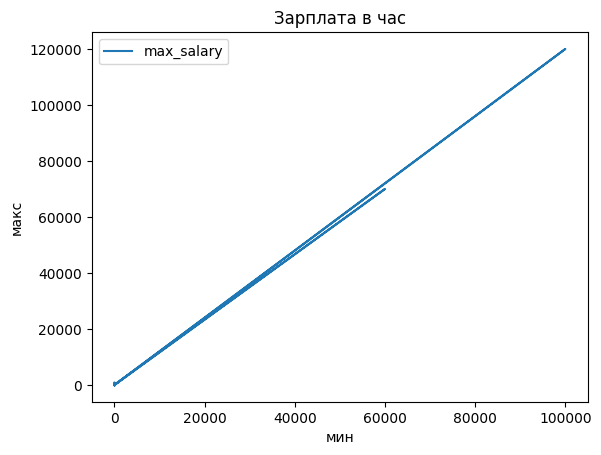

In [ ]:
salary_del = salary_del[salary_del['salary'].str.contains('/hour')]
salary_del['min_salary'] = salary_del['salary'].str.split('-').str[0].str.replace(',', '').str.extract(r'(\d+\.?\d*)').astype(float)
salary_del['max_salary'] = salary_del['salary'].str.split('-').str[1].str.replace(',', '').str.extract(r'(\d+\.?\d*)').astype(float)
salary_del.plot(x='min_salary', y='max_salary')
plt.title('Зарплата в час')
plt.xlabel('мин')
plt.ylabel('макс')
plt.show()

In [ ]:
salary_del = pd.concat([salary_del, salary_df], ignore_index=True)

key = ['job_title', 'job_type', 'organization', 'date_added', 'salary']
salary_del = salary_del.drop_duplicates(subset=key)
salary_del.reset_index(drop= True , inplace= True)
salary_del

,date_added,job_description,job_title,job_type,organization,page_url,salary,sector,city,state,index,from,to,hour/year,bonus,min_salary,max_salary
0,NaN,Launch your teaching career with the Leader in...,Primrose Private Preschool Teacher Job in Houston,Full Time,Education,http://jobview.monster.com/Primrose-Private-Pr...,9.00 - 13.00 $ /hour,Entry Level,Houston,TX,77098,9.00,13.00,/hour,NaN,9.00,13.00
1,NaN,A Surveyor Assistant is needed for a leading e...,Surveyor - Trimble /Field Link /Construction J...,Full Time Temporary/Contract/Project,NaN,http://jobview.monster.com/Surveyor-Trimble-Fi...,15.00 - 16.00 $ /hour,NaN,Houston,TX,77001,15.00,16.00,/hour,NaN,15.00,16.00
2,NaN,"Job Purpose:Delivers items by preparing, loadi...",Local/Delivery Truck Driver Job in Denver,Full Time,Walter Industrial and Sanitary Supply,http://jobview.monster.com/Local-Delivery-Truc...,13.75 - 16.75 $ /hourYear End Bonus,Experienced (Non-Manager),Denver,CO,80216,13.75,16.75,/hourYear,End,13.75,16.75
3,NaN,Engineering client is looking for a Sr. Mechan...,Mechanical Engineer - Mechanical/Building/Faci...,Full Time Temporary/Contract/Project,NaN,http://jobview.monster.com/Mechanical-Engineer...,40.00 - 50.00 $ /hour,NaN,New York,"York,",NY,40.00,50.00,/hour,NaN,40.00,50.00
4,NaN,Mechanical or Vessel Engineer will perform det...,Contract Mechanical/Vessel Engineer Job in Tel...,Part Time,Marine Mfg & Services,http://jobview.monster.com/Contract-Mechanical...,45.00 - 50.00 $ /hour,Experienced (Non-Manager),Telecommute,NaN,NaN,45.00,50.00,/hour,NaN,45.00,50.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,NaN,Position Summary:Packaging Operator's primary ...,Packaging Operator Job in Mooresville,Temporary/Contract/Project,Manufacturing - Other,http://jobview.monster.com/Packaging-Operator-...,9.00 - 9.00 $,NaN,NaN,NaN,NaN,9.00,9.00,$,NaN,NaN,NaN
997,NaN,JOB SUMMARY:Manufacturing facility in Downingt...,Packer/Feeder Job in Downingtown,Temporary/Contract/Project,Manufacturing - Other,http://jobview.monster.com/Packer-Feeder-Job-D...,11.00 - 11.00 $,NaN,NaN,NaN,NaN,11.00,11.00,$,NaN,NaN,NaN
998,NaN,POSITIONThe Assistant Store Manager will be pa...,ASSISTANT STORE MANAGER – retail / customer se...,Full Time Employee,RetailBankingFinancial Services,http://jobview.monster.com/ASSISTANT-STORE-MAN...,"31,054.00 - 31,054.00 $",Sales/Retail/Business Development,NaN,NaN,NaN,"31,054.00","31,054.00",$,NaN,NaN,NaN
999,NaN,POSITIONThe Assistant Store Manager will be pa...,ASSISTANT STORE MANAGER – retail / customer se...,Full Time Employee,RetailBankingFinancial Services,http://jobview.monster.com/ASSISTANT-STORE-MAN...,"31,054.00 - 31,054.00 $",Sales/Retail/Business Development,NaN,NaN,NaN,"31,054.00","31,054.00",$,NaN,NaN,NaN


Сделайте выводы по графику и выведите правило определения, за какой период времени указана зарплата. Проверьте, что ничего не упустили.

In [ ]:
df_4['salary'] = 0
df_4 = df_4[df_4['salary'] == 0]

**Что мы можем увидеть?**

Зарплата также может быть указана в месяц (month) и в неделю (week) – учтите это при составлении общего регулярного выражения.

Также в начале некоторых строк есть лишние пробелы, которые мы также учитываем.

Разделим столбец `salary` на зарплаты от, до, временной интервал (час, месяц, год) и бонусы. Для строк не попавших ни в одну категорию или с NaN в колонке salary установим все как NaN.

Также добавим колонку которая разделяет тип предложений (от-до, от, до, нет).

In [ ]:
df_4 = pd.concat([salary_del,df_4], ignore_index=True)

key = ['date_added',	'job_description',	'job_title', 'job_type', 'organization']
df_4 = df_4.drop_duplicates(subset=key)
df_4.reset_index(drop= True , inplace= True)
df_4

,date_added,job_description,job_title,job_type,organization,page_url,salary,sector,city,state,index,from,to,hour/year,bonus,min_salary,max_salary
0,NaN,Launch your teaching career with the Leader in...,Primrose Private Preschool Teacher Job in Houston,Full Time,Education,http://jobview.monster.com/Primrose-Private-Pr...,9.00 - 13.00 $ /hour,Entry Level,Houston,TX,77098,9.00,13.00,/hour,NaN,9.00,13.00
1,NaN,A Surveyor Assistant is needed for a leading e...,Surveyor - Trimble /Field Link /Construction J...,Full Time Temporary/Contract/Project,NaN,http://jobview.monster.com/Surveyor-Trimble-Fi...,15.00 - 16.00 $ /hour,NaN,Houston,TX,77001,15.00,16.00,/hour,NaN,15.00,16.00
2,NaN,"Job Purpose:Delivers items by preparing, loadi...",Local/Delivery Truck Driver Job in Denver,Full Time,Walter Industrial and Sanitary Supply,http://jobview.monster.com/Local-Delivery-Truc...,13.75 - 16.75 $ /hourYear End Bonus,Experienced (Non-Manager),Denver,CO,80216,13.75,16.75,/hourYear,End,13.75,16.75
3,NaN,Engineering client is looking for a Sr. Mechan...,Mechanical Engineer - Mechanical/Building/Faci...,Full Time Temporary/Contract/Project,NaN,http://jobview.monster.com/Mechanical-Engineer...,40.00 - 50.00 $ /hour,NaN,New York,"York,",NY,40.00,50.00,/hour,NaN,40.00,50.00
4,NaN,Mechanical or Vessel Engineer will perform det...,Contract Mechanical/Vessel Engineer Job in Tel...,Part Time,Marine Mfg & Services,http://jobview.monster.com/Contract-Mechanical...,45.00 - 50.00 $ /hour,Experienced (Non-Manager),Telecommute,NaN,NaN,45.00,50.00,/hour,NaN,45.00,50.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18066,NaN,Location: ChicagoPay rate 18.00-20.00Contract/...,Junior Accountant Job in Chicago,Full Time Temporary/Contract/Project,Accounting and Auditing Services,http://jobview.monster.com/Junior-Accountant-J...,0,Accounting/Finance/Insurance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18067,NaN,Associate Customer Business Manager Location: ...,Associate Customer Business Manager Job in Cin...,Full Time Employee,NaN,http://jobview.monster.com/Associate-Customer-...,0,Sales/Retail/Business Development,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18068,NaN,Join the Market Leader!CCL Label Cold Spring i...,Quality Engineer Job in Cold Spring,Full Time,Printing and Publishing,http://jobview.monster.com/Quality-Engineer-Jo...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18069,NaN,Maintenance Planner-16150DescriptionLocation: ...,Maintenance Planner Job in Cincinnati,Full Time Employee,NaN,http://jobview.monster.com/Maintenance-Planner...,0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Обработка колонки job_type

Выясните, какие форматы значений есть в столбце `job_type`. Сделайте выводы. При необходимости – стройте графики.

In [ ]:
df_4['job_type'].unique()

array(['Full Time Employee', 'Full Time', 'Part Time Employee', nan,
       'Full Time, Employee', 'Full Time Temporary/Contract/Project',
       'Full Time , Employee', 'Employee', 'Part Time',
       'Full Time, Temporary/Contract/Project', 'Part Time, Employee',
       'Full Time Intern', 'Temporary/Contract/Project',
       'Full Time / Employee', 'Full Time , Temporary/Contract/Project',
       'Per Diem, Employee', 'Job Type Full Time Employee', 'Per Diem',
       'Part Time, Temporary/Contract/Project', 'Full Time\xa0',
       'Part Time Intern', 'Per Diem Employee',
       'Part Time/ Temporary/Contract/Project',
       'Part Time Temporary/Contract/Project',
       'Part Time , Temporary/Contract/Project', 'Full Time\xa0 Employee',
       'Part Time Seasonal', 'Part Time , Employee', 'Job Type Employee',
       'Part Time\xa0', 'Full Time / Temporary/Contract/Project',
       'Part Time, Intern', 'Job Type Full Time', 'Part Time / Employee',
       'Job Type Full Time Temporar

Вы заметили, что многие значения фактически одинаковые, но немного по-разному отформатированы? Приведем их к единому формату.

In [ ]:
jobtype=df_4['job_type'].str.split(',')
df_4['job_type']=jobtype.str[0]

df_4['job_type'][df_4['job_type']=='Job Type Part Time Employee']='Part Time, Employee'
df_4['job_type'][df_4['job_type']=='Full Time ']='Full Time'
df_4['job_type'][df_4['job_type']=='Employee']='Full Time, Employee'
df_4['job_type'][df_4['job_type']=='Job Type Full Time Employee']='Full Time, Employee'
df_4['job_type'][df_4['job_type']=='Job Type Full Time']='Full Time'
df_4['job_type'][df_4['job_type']=='Full Time\xa0']='Full Time'
df_4['job_type'][df_4['job_type']=='Part Time/ Temporary/Contract/Project']='Part Time, Temporary/Contract/Project'
df_4['job_type'][df_4['job_type']=='Part Time ']='Part Time'
df_4['job_type'][df_4['job_type']=='Job Type Employee']='Full Time'
df_4['job_type'][df_4['job_type']=='Temporary/Contract/Project']='Full Time, Temporary/Contract/Project'
df_4['job_type'][df_4['job_type']=='Full Time / Employee']='Full Time, Employee'
df_4['job_type'][df_4['job_type']=='Full Time\xa0 Employee']='Full Time, Employee'
df_4['job_type'][df_4['job_type']=='Part Time\xa0']='Part Time'
df_4['job_type'][df_4['job_type']=='Part Time / Employee']='Part Time, Employee'
df_4['job_type'][df_4['job_type']=='Job Type Full Time Temporary/Contract/Project']='Full Time, Temporary/Contract/Project'
df_4['job_type'][df_4['job_type']=='Full Time/ Employee']='Full Time, Employee'
df_4['job_type'][df_4['job_type']=='Full Time / > Employee']='Full Time, Employee'
df_4['job_type'][df_4['job_type']=='Full Time Employee']='Full Time, Employee'
df_4['job_type'][df_4['job_type']=='Part Time Employee']='Part Time, Employee'
df_4['job_type'][df_4['job_type']=='Full Time Temporary/Contract/Project']='Full Time, Temporary/Contract/Project'
df_4['job_type'][df_4['job_type']=='Full Time Intern']='Full Time, Intern'
df_4['job_type'][df_4['job_type']=='Part Time Intern']='Part Time, Intern'
df_4['job_type'][df_4['job_type']=='Per Diem Employee']='Per Diem, Employee'
df_4['job_type'][df_4['job_type']=='Part Time Temporary/Contract/Projec']='Part Time, Temporary/Contract/Projec'
df_4['job_type'][df_4['job_type']=='Part Time Seasonal']='Part Time, Seasonal'
df_4['job_type'][df_4['job_type']=='Full Time / Temporary/Contract/Project']='Full Time, / Temporary/Contract/Project'
df_4['job_type'][df_4['job_type']=='Part Time Temporary/Contract/Project']='Part Time, Temporary/Contract/Project'


df_4['job_type'].unique()

<ipython-input-248-64a99980c1c3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4['job_type'][df_4['job_type']=='Job Type Part Time Employee']='Part Time, Employee'
<ipython-input-248-64a99980c1c3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4['job_type'][df_4['job_type']=='Full Time ']='Full Time'
<ipython-input-248-64a99980c1c3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4['job_type'][df_4['job_type']=='Employee

array(['Full Time', 'Full Time, Temporary/Contract/Project', 'Part Time',
       'Full Time, Employee', 'Part Time, Employee', 'Per Diem',
       'Part Time, Intern', nan, 'Part Time, Temporary/Contract/Project',
       'Full Time, Intern', 'Per Diem, Employee', 'Part Time, Seasonal',
       'Full Time, / Temporary/Contract/Project', 'Exempt'], dtype=object)

Теперь видно, что тип работы состоит из двух частей: полноты занятости (Full Time, Part Time, ...) и типа занятости (Employee, Intern, ...). Встречаются неполные записи. Будем считать по умолчанию полноту занятости Full Time и тип занятости Employee и разделим эту колонку на две.

In [ ]:
jobtype=df_4['job_type'].str.split(',')
# print(jobtype.str[0], jobtype.str[1])
df_4['Job']=jobtype.str[0]
df_4['Type']=jobtype.str[1]
df_4

,date_added,job_description,job_title,job_type,organization,page_url,salary,sector,city,state,index,from,to,hour/year,bonus,min_salary,max_salary,Job,Type
0,NaN,Launch your teaching career with the Leader in...,Primrose Private Preschool Teacher Job in Houston,Full Time,Education,http://jobview.monster.com/Primrose-Private-Pr...,9.00 - 13.00 $ /hour,Entry Level,Houston,TX,77098,9.00,13.00,/hour,NaN,9.00,13.00,Full Time,NaN
1,NaN,A Surveyor Assistant is needed for a leading e...,Surveyor - Trimble /Field Link /Construction J...,"Full Time, Temporary/Contract/Project",NaN,http://jobview.monster.com/Surveyor-Trimble-Fi...,15.00 - 16.00 $ /hour,NaN,Houston,TX,77001,15.00,16.00,/hour,NaN,15.00,16.00,Full Time,Temporary/Contract/Project
2,NaN,"Job Purpose:Delivers items by preparing, loadi...",Local/Delivery Truck Driver Job in Denver,Full Time,Walter Industrial and Sanitary Supply,http://jobview.monster.com/Local-Delivery-Truc...,13.75 - 16.75 $ /hourYear End Bonus,Experienced (Non-Manager),Denver,CO,80216,13.75,16.75,/hourYear,End,13.75,16.75,Full Time,NaN
3,NaN,Engineering client is looking for a Sr. Mechan...,Mechanical Engineer - Mechanical/Building/Faci...,"Full Time, Temporary/Contract/Project",NaN,http://jobview.monster.com/Mechanical-Engineer...,40.00 - 50.00 $ /hour,NaN,New York,"York,",NY,40.00,50.00,/hour,NaN,40.00,50.00,Full Time,Temporary/Contract/Project
4,NaN,Mechanical or Vessel Engineer will perform det...,Contract Mechanical/Vessel Engineer Job in Tel...,Part Time,Marine Mfg & Services,http://jobview.monster.com/Contract-Mechanical...,45.00 - 50.00 $ /hour,Experienced (Non-Manager),Telecommute,NaN,NaN,45.00,50.00,/hour,NaN,45.00,50.00,Part Time,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18066,NaN,Location: ChicagoPay rate 18.00-20.00Contract/...,Junior Accountant Job in Chicago,"Full Time, Temporary/Contract/Project",Accounting and Auditing Services,http://jobview.monster.com/Junior-Accountant-J...,0,Accounting/Finance/Insurance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Full Time,Temporary/Contract/Project
18067,NaN,Associate Customer Business Manager Location: ...,Associate Customer Business Manager Job in Cin...,"Full Time, Employee",NaN,http://jobview.monster.com/Associate-Customer-...,0,Sales/Retail/Business Development,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Full Time,Employee
18068,NaN,Join the Market Leader!CCL Label Cold Spring i...,Quality Engineer Job in Cold Spring,Full Time,Printing and Publishing,http://jobview.monster.com/Quality-Engineer-Jo...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Full Time,NaN
18069,NaN,Maintenance Planner-16150DescriptionLocation: ...,Maintenance Planner Job in Cincinnati,"Full Time, Employee",NaN,http://jobview.monster.com/Maintenance-Planner...,0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Full Time,Employee


In [ ]:
df_4['Job'] = df_4['Job']. fillna('Full Time')
df_4['Type'] = df_4['Type']. fillna('Employee')
df_4

,date_added,job_description,job_title,job_type,organization,page_url,salary,sector,city,state,index,from,to,hour/year,bonus,min_salary,max_salary,Job,Type
0,NaN,Launch your teaching career with the Leader in...,Primrose Private Preschool Teacher Job in Houston,Full Time,Education,http://jobview.monster.com/Primrose-Private-Pr...,9.00 - 13.00 $ /hour,Entry Level,Houston,TX,77098,9.00,13.00,/hour,NaN,9.00,13.00,Full Time,Employee
1,NaN,A Surveyor Assistant is needed for a leading e...,Surveyor - Trimble /Field Link /Construction J...,"Full Time, Temporary/Contract/Project",NaN,http://jobview.monster.com/Surveyor-Trimble-Fi...,15.00 - 16.00 $ /hour,NaN,Houston,TX,77001,15.00,16.00,/hour,NaN,15.00,16.00,Full Time,Temporary/Contract/Project
2,NaN,"Job Purpose:Delivers items by preparing, loadi...",Local/Delivery Truck Driver Job in Denver,Full Time,Walter Industrial and Sanitary Supply,http://jobview.monster.com/Local-Delivery-Truc...,13.75 - 16.75 $ /hourYear End Bonus,Experienced (Non-Manager),Denver,CO,80216,13.75,16.75,/hourYear,End,13.75,16.75,Full Time,Employee
3,NaN,Engineering client is looking for a Sr. Mechan...,Mechanical Engineer - Mechanical/Building/Faci...,"Full Time, Temporary/Contract/Project",NaN,http://jobview.monster.com/Mechanical-Engineer...,40.00 - 50.00 $ /hour,NaN,New York,"York,",NY,40.00,50.00,/hour,NaN,40.00,50.00,Full Time,Temporary/Contract/Project
4,NaN,Mechanical or Vessel Engineer will perform det...,Contract Mechanical/Vessel Engineer Job in Tel...,Part Time,Marine Mfg & Services,http://jobview.monster.com/Contract-Mechanical...,45.00 - 50.00 $ /hour,Experienced (Non-Manager),Telecommute,NaN,NaN,45.00,50.00,/hour,NaN,45.00,50.00,Part Time,Employee
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18066,NaN,Location: ChicagoPay rate 18.00-20.00Contract/...,Junior Accountant Job in Chicago,"Full Time, Temporary/Contract/Project",Accounting and Auditing Services,http://jobview.monster.com/Junior-Accountant-J...,0,Accounting/Finance/Insurance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Full Time,Temporary/Contract/Project
18067,NaN,Associate Customer Business Manager Location: ...,Associate Customer Business Manager Job in Cin...,"Full Time, Employee",NaN,http://jobview.monster.com/Associate-Customer-...,0,Sales/Retail/Business Development,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Full Time,Employee
18068,NaN,Join the Market Leader!CCL Label Cold Spring i...,Quality Engineer Job in Cold Spring,Full Time,Printing and Publishing,http://jobview.monster.com/Quality-Engineer-Jo...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Full Time,Employee
18069,NaN,Maintenance Planner-16150DescriptionLocation: ...,Maintenance Planner Job in Cincinnati,"Full Time, Employee",NaN,http://jobview.monster.com/Maintenance-Planner...,0,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Full Time,Employee


Колонку `job_description` оставим без изменения, так как она содержит текстовое описание вакансии.

### Столбцы job_title, organization, sector

Для столбцов `job_title`, `organization` и `sector` самостоятельно выявите и реализуйте этапы анализа.

In [ ]:
df_4['job_title'].unique()

array(['Primrose Private Preschool Teacher Job in Houston',
       'Surveyor - Trimble /Field Link /Construction Job in Houston',
       'Local/Delivery Truck Driver Job in Denver', ...,
       'Quality Engineer Job in Cold Spring',
       'Maintenance Planner Job in Cincinnati',
       'Production Specialist – Mortgage Loan Processor Job in Day Heights'],
      dtype=object)

**Изменила значения работ, убрала лишнюю информацию(например, местоположение)**

In [ ]:
df_4['job_title'] = df_4['job_title']. replace(['Primrose Private Preschool Teacher Job in Houston', 'Surveyor - Trimble /Field Link /Construction Job in Houston', 'Local/Delivery Truck Driver Job in Denver'], ['Primrose Private Preschool Teacher', 'Trimble /Field Link /Construction', 'Local/Delivery Truck Driver'])
df_4['job_title'] = df_4['job_title']. replace(['Quality Engineer Job in Cold Spring', 'Maintenance Planner Job in Cincinnati', 'Production Specialist – Mortgage Loan Processor Job in Day Heights'], ['Quality Engineer', 'Maintenance Planner Job', 'Production Specialist'])
df_4['job_title'].unique()

array(['Primrose Private Preschool Teacher',
       'Trimble /Field Link /Construction', 'Local/Delivery Truck Driver',
       ..., 'Quality Engineer', 'Maintenance Planner Job',
       'Production Specialist'], dtype=object)

In [ ]:
df_4['organization'].unique()

array(['Education', nan, 'Walter Industrial and Sanitary Supply',
       'Marine Mfg & Services', 'Manufacturing - Other',
       'Aerospace and DefenseManufacturing - Other',
       'Security and Surveillance', 'Government and Military',
       'Part Time Deputy Judicial Marshal - Belfast',
       'Computer/IT Services', 'Legal Services',
       'Business Services - Other', 'InsuranceSecurity and Surveillance',
       'Legal ServicesBusiness Services - Other',
       'Telecommunications Services', 'Accounting and Auditing Services',
       'Other/Not Classified',
       'Computer HardwareComputer SoftwareComputer/IT Services',
       'Automotive Sales and Repair Services', 'Healthcare Services',
       'Sandy Springs, GA 30342',
       'Computer/IT ServicesOther/Not Classified',
       'Automotive and Parts Mfg', 'Computer Software',
       'Healthcare ServicesStaffing/Employment Agencies', 'Retail',
       'Field Service Technician', 'Biotechnology/Pharmaceuticals', 'All',
       'En

In [ ]:
# можно перевести все в нижний регистр и удалить некорректные символы
def clean_text(text):
    text = text.lower()
    regular = r'[\*+\#+\№\"\-+\+\=+\?+\&\^\.+\;\,+\>+\(\)\/+\:\\+]'
    text = re.sub(regular, '', text)
    return text


cleaned_text = []
for text in df_4['organization']:
    text = clean_text(str(text))
    cleaned_text.append(text)
cleaned_text1 = []
for text in df_4['sector']:
    text = clean_text(str(text))
    cleaned_text1.append(text)
df_4['organization_new'] = cleaned_text
df_4['sector_new'] = cleaned_text1
df_4 = df_4.drop(['organization', 'sector', 'salary'], axis = 1)
df_4

,date_added,job_description,job_title,job_type,page_url,city,state,index,from,to,hour/year,bonus,min_salary,max_salary,Job,Type,organization_new,sector_new
0,NaN,Launch your teaching career with the Leader in...,Primrose Private Preschool Teacher,Full Time,http://jobview.monster.com/Primrose-Private-Pr...,Houston,TX,77098,9.00,13.00,/hour,NaN,9.00,13.00,Full Time,Employee,education,entry level
1,NaN,A Surveyor Assistant is needed for a leading e...,Trimble /Field Link /Construction,"Full Time, Temporary/Contract/Project",http://jobview.monster.com/Surveyor-Trimble-Fi...,Houston,TX,77001,15.00,16.00,/hour,NaN,15.00,16.00,Full Time,Temporary/Contract/Project,nan,nan
2,NaN,"Job Purpose:Delivers items by preparing, loadi...",Local/Delivery Truck Driver,Full Time,http://jobview.monster.com/Local-Delivery-Truc...,Denver,CO,80216,13.75,16.75,/hourYear,End,13.75,16.75,Full Time,Employee,walter industrial and sanitary supply,experienced nonmanager
3,NaN,Engineering client is looking for a Sr. Mechan...,Mechanical Engineer - Mechanical/Building/Faci...,"Full Time, Temporary/Contract/Project",http://jobview.monster.com/Mechanical-Engineer...,New York,"York,",NY,40.00,50.00,/hour,NaN,40.00,50.00,Full Time,Temporary/Contract/Project,nan,nan
4,NaN,Mechanical or Vessel Engineer will perform det...,Contract Mechanical/Vessel Engineer Job in Tel...,Part Time,http://jobview.monster.com/Contract-Mechanical...,Telecommute,NaN,NaN,45.00,50.00,/hour,NaN,45.00,50.00,Part Time,Employee,marine mfg services,experienced nonmanager
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18066,NaN,Location: ChicagoPay rate 18.00-20.00Contract/...,Junior Accountant Job in Chicago,"Full Time, Temporary/Contract/Project",http://jobview.monster.com/Junior-Accountant-J...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Full Time,Temporary/Contract/Project,accounting and auditing services,accountingfinanceinsurance
18067,NaN,Associate Customer Business Manager Location: ...,Associate Customer Business Manager Job in Cin...,"Full Time, Employee",http://jobview.monster.com/Associate-Customer-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Full Time,Employee,nan,salesretailbusiness development
18068,NaN,Join the Market Leader!CCL Label Cold Spring i...,Quality Engineer,Full Time,http://jobview.monster.com/Quality-Engineer-Jo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Full Time,Employee,printing and publishing,nan
18069,NaN,Maintenance Planner-16150DescriptionLocation: ...,Maintenance Planner Job,"Full Time, Employee",http://jobview.monster.com/Maintenance-Planner...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Full Time,Employee,nan,other


### Краткая статистика очищенных данных

Проанализируйте результаты обработки данных.
1. Сравните, что было до и после.
2. Определите, какие еще этапы можно было бы включить. Выберите один и реализуйте его. Если на ваш взгляд, текущего состояния достаточно, определите, какие задачи можно решать с помощью обработанного датасета и опишите этапы обработки, которые для них могут понадобиться.

In [ ]:
df_4

,date_added,job_description,job_title,job_type,page_url,city,state,index,from,to,hour/year,bonus,min_salary,max_salary,Job,Type,organization_new,sector_new
0,NaN,Launch your teaching career with the Leader in...,Primrose Private Preschool Teacher,Full Time,http://jobview.monster.com/Primrose-Private-Pr...,Houston,TX,77098,9.00,13.00,/hour,NaN,9.00,13.00,Full Time,Employee,education,entry level
1,NaN,A Surveyor Assistant is needed for a leading e...,Trimble /Field Link /Construction,"Full Time, Temporary/Contract/Project",http://jobview.monster.com/Surveyor-Trimble-Fi...,Houston,TX,77001,15.00,16.00,/hour,NaN,15.00,16.00,Full Time,Temporary/Contract/Project,nan,nan
2,NaN,"Job Purpose:Delivers items by preparing, loadi...",Local/Delivery Truck Driver,Full Time,http://jobview.monster.com/Local-Delivery-Truc...,Denver,CO,80216,13.75,16.75,/hourYear,End,13.75,16.75,Full Time,Employee,walter industrial and sanitary supply,experienced nonmanager
3,NaN,Engineering client is looking for a Sr. Mechan...,Mechanical Engineer - Mechanical/Building/Faci...,"Full Time, Temporary/Contract/Project",http://jobview.monster.com/Mechanical-Engineer...,New York,"York,",NY,40.00,50.00,/hour,NaN,40.00,50.00,Full Time,Temporary/Contract/Project,nan,nan
4,NaN,Mechanical or Vessel Engineer will perform det...,Contract Mechanical/Vessel Engineer Job in Tel...,Part Time,http://jobview.monster.com/Contract-Mechanical...,Telecommute,NaN,NaN,45.00,50.00,/hour,NaN,45.00,50.00,Part Time,Employee,marine mfg services,experienced nonmanager
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18066,NaN,Location: ChicagoPay rate 18.00-20.00Contract/...,Junior Accountant Job in Chicago,"Full Time, Temporary/Contract/Project",http://jobview.monster.com/Junior-Accountant-J...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Full Time,Temporary/Contract/Project,accounting and auditing services,accountingfinanceinsurance
18067,NaN,Associate Customer Business Manager Location: ...,Associate Customer Business Manager Job in Cin...,"Full Time, Employee",http://jobview.monster.com/Associate-Customer-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Full Time,Employee,nan,salesretailbusiness development
18068,NaN,Join the Market Leader!CCL Label Cold Spring i...,Quality Engineer,Full Time,http://jobview.monster.com/Quality-Engineer-Jo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Full Time,Employee,printing and publishing,nan
18069,NaN,Maintenance Planner-16150DescriptionLocation: ...,Maintenance Planner Job,"Full Time, Employee",http://jobview.monster.com/Maintenance-Planner...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Full Time,Employee,nan,other


In [ ]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18071 entries, 0 to 18070
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date_added        112 non-null    object 
 1   job_description   18071 non-null  object 
 2   job_title         18071 non-null  object 
 3   job_type          16739 non-null  object 
 4   page_url          18071 non-null  object 
 5   city              13702 non-null  object 
 6   state             13267 non-null  object 
 7   index             8162 non-null   object 
 8   from              1001 non-null   object 
 9   to                934 non-null    object 
 10  hour/year         900 non-null    object 
 11  bonus             60 non-null     object 
 12  min_salary        971 non-null    float64
 13  max_salary        900 non-null    float64
 14  Job               18071 non-null  object 
 15  Type              18071 non-null  object 
 16  organization_new  18071 non-null  object

In [ ]:
df

,date_added,job_description,job_title,job_type,location,organization,page_url,salary,sector
0,NaN,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,http://jobview.monster.com/it-support-technici...,NaN,IT/Software Development
1,NaN,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-e...,NaN,NaN
2,NaN,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,http://jobview.monster.com/senior-training-lea...,NaN,NaN
3,NaN,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,http://jobview.monster.com/engineer-quality-jo...,NaN,Experienced (Non-Manager)
4,NaN,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,http://jobview.monster.com/shift-supervisor-pa...,NaN,Project/Program Management
...,...,...,...,...,...,...,...,...,...
21995,NaN,This is a major premier Cincinnati based finan...,Assistant Vice President - Controller Job in C...,Full Time,"Cincinnati, OH",NaN,http://jobview.monster.com/Assistant-Vice-Pres...,"120,000.00 - 160,000.00 $ /yearbonus",NaN
21996,NaN,Luxury homebuilder in Cincinnati seeking multi...,Accountant Job in Cincinnati,Full Time,"Cincinnati, OH 45236",Construction - Residential & Commercial/Office,http://jobview.monster.com/Accountant-Job-Cinc...,"45,000.00 - 60,000.00 $ /year",Manager (Manager/Supervisor of Staff)
21997,NaN,RE: Adobe AEM- Client - Loca...,AEM/CQ developer Job in Chicago,Full Time,"Chicago, IL 60602",NaN,http://jobview.monster.com/AEM-CQ5-developer-J...,NaN,NaN
21998,NaN,Jernberg Industries was established in 1937 an...,Electrician - Experienced Forging Electrician ...,Full Time Employee,"Chicago, IL 60609","Jernberg Industries, Inc.",http://jobview.monster.com/Electrician-Experie...,25.00 - 28.00 $ /hour,Installation/Maintenance/Repair


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date_added       122 non-null    object
 1   job_description  22000 non-null  object
 2   job_title        22000 non-null  object
 3   job_type         20372 non-null  object
 4   location         22000 non-null  object
 5   organization     15133 non-null  object
 6   page_url         22000 non-null  object
 7   salary           3446 non-null   object
 8   sector           16806 non-null  object
dtypes: object(9)
memory usage: 1.5+ MB


**Таким образом, потеряно только 3929 строк(около 17%), но при этом улучшены практически все столбцы, особенно job_type, location, salary. Теперь данные более понятны и читаемы, с ними легче выполнять задачи**

Текущего состояния достаточно, можно выполнить подсчет полноты занятости, подсчет типа занятости (например, посчитать сколько людей работают на Full Time и тд), также составлять статистику для определенного города (например, сколько работ в определенном городе) и так далее
